In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [18]:
df = pd.read_csv('/kaggle/input/titanic/train.csv',usecols=['Survived','Ticket','Cabin','SibSp','Parch'])
df.head()

,Survived,SibSp,Parch,Ticket,Cabin
0,0,1,0,A/5 21171,NaN
1,1,1,0,PC 17599,C85
2,1,0,0,STON/O2. 3101282,NaN
3,1,1,0,113803,C123
4,0,0,0,373450,NaN


In [19]:
df['Number']=df['SibSp']+df['Parch']

In [20]:
df.drop(columns=['SibSp','Parch'],inplace=True)
df.head()

,Survived,Ticket,Cabin,Number
0,0,A/5 21171,NaN,1
1,1,PC 17599,C85,1
2,1,STON/O2. 3101282,NaN,0
3,1,113803,C123,1
4,0,373450,NaN,0


In [21]:
df['Number'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [22]:
def alone(x):
    if x==0:
        return 'A'
    else:
        return x

In [23]:
df['Number']=df['Number'].apply(alone)

In [24]:
df['Number'].unique()

array([1, 'A', 4, 2, 6, 5, 3, 7, 10], dtype=object)

In [25]:
df.head()

,Survived,Ticket,Cabin,Number
0,0,A/5 21171,NaN,1
1,1,PC 17599,C85,1
2,1,STON/O2. 3101282,NaN,A
3,1,113803,C123,1
4,0,373450,NaN,A


Text(0.5, 1.0, 'Passengers travelling with')

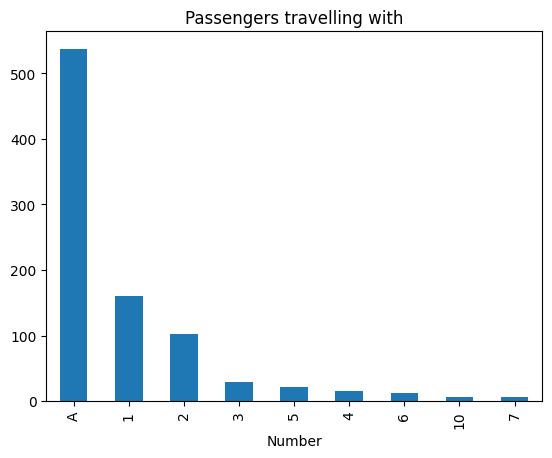

In [27]:
fig = df['Number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [28]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["Number"],errors='coerce',downcast='integer')

In [29]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['Number'],np.nan)

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Ticket,Cabin,Number,number_numerical,number_categorical
0,0,A/5 21171,NaN,1,1.0,NaN
1,1,PC 17599,C85,1,1.0,NaN
2,1,STON/O2. 3101282,NaN,A,NaN,A
3,1,113803,C123,1,1.0,NaN
4,0,373450,NaN,A,NaN,A


In [30]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Ticket,Cabin,Number,number_numerical,number_categorical,cabin_num,cabin_cat
0,0,A/5 21171,NaN,1,1.0,NaN,NaN,NaN
1,1,PC 17599,C85,1,1.0,NaN,85,C
2,1,STON/O2. 3101282,NaN,A,NaN,A,NaN,NaN
3,1,113803,C123,1,1.0,NaN,123,C
4,0,373450,NaN,A,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

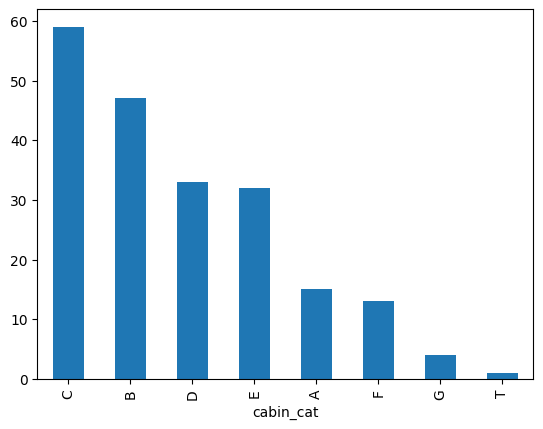

In [32]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [33]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [34]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Ticket,Cabin,Number,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,0,A/5 21171,NaN,1,1.0,NaN,NaN,NaN,21171.0,A/5
1,1,PC 17599,C85,1,1.0,NaN,85,C,17599.0,PC
2,1,STON/O2. 3101282,NaN,A,NaN,A,NaN,NaN,3101282.0,STON/O2.
3,1,113803,C123,1,1.0,NaN,123,C,113803.0,NaN
4,0,373450,NaN,A,NaN,A,NaN,NaN,373450.0,NaN


In [35]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)